<a href="https://colab.research.google.com/github/munieshwarevakattu/CMPE257-FALL23-MUNIESHWAR-EVAKATTU/blob/take-home-exam/ML_Take_Home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np

training_data = pd.read_csv('/content/drive/MyDrive/data/synthetic_dataset (2).csv')
validation_data = pd.read_csv('/content/drive/MyDrive/data/synthetic_test_dataset.csv')

def polynomial_transform(features, degree):
    if degree == 2:
        return np.column_stack((features, features[:, 0]**2, features[:, 1]**2, features[:, 0] * features[:, 1]))
    elif degree == 3:
        return np.column_stack((features, features[:, 0]**2, features[:, 1]**2, features[:, 0]**3, features[:, 1]**3, features[:, 0]**2 * features[:, 1], features[:, 1]**2 * features[:, 0]))
    elif degree == 4:
        return np.column_stack((features, features[:, 0]**2, features[:, 1]**2, features[:, 0]**3, features[:, 1]**3, features[:, 0]*features[:, 1], features[:, 0]**2 * features[:, 1]**2, features[:, 0]**4, features[:, 1]**4, features[:, 0]**2 * features[:, 1]**2 * features[:, 0], features[:, 0] * features[:, 1]**3))
    else:
        return features


class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def train(self, X, y):
        num_features = X.shape[1]
        self.weights = np.zeros(num_features)
        self.bias = 0

        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                prediction = np.dot(X[i], self.weights) + self.bias
                activation = np.sign(prediction)
                update = self.learning_rate * (y[i] - activation)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        prediction = np.dot(X, self.weights) + self.bias
        return np.where(prediction >= 0, 1, -1)

In [10]:
X_train = training_data[['x1', 'x2']].values
y_train = training_data['y'].values

X_val = validation_data[['x1', 'x2']].values
y_val = validation_data['y'].values



degrees = [1, 2, 3, 4]

train_errors = []
val_errors = []
train_misclassified = []
val_misclassified = []

for degree in degrees:
    if degree == 1:
        model_features = X_train
        val_model_features = X_val
    else:
        model_features = polynomial_transform(X_train, degree)
        val_model_features = polynomial_transform(X_val, degree)

    pla_model = Perceptron()
    pla_model.train(model_features, y_train)
    train_predictions = pla_model.predict(model_features)
    val_predictions = pla_model.predict(val_model_features)
    train_error = np.mean(train_predictions != y_train)
    val_error = np.mean(val_predictions != y_val)

    train_misclassified.append(np.sum(train_predictions != y_train))
    val_misclassified.append(np.sum(val_predictions != y_val))

    train_errors.append(train_error)
    val_errors.append(val_error)

In [11]:
labels = ["Training Error", "Validation Error", "Training Misclassified Points", "ValidationMisclassifiedPoints"]
results = []

for i, degree in enumerate(degrees):
    result = {
        f"Degree {degree} ": {
            label: value for label, value in zip(labels, [
                train_errors[i],
                val_errors[i],
                train_misclassified[i],
                val_misclassified[i]
            ])
        }
    }
    results.append(result)
for label in ["", *labels]:
    print(label.ljust(30), end="")
    for result in results:
        for degree, values in result.items():
            print(str(values.get(label, degree)).ljust(30), end="")
    print("")

                              Degree 1                      Degree 2                      Degree 3                      Degree 4                      
Training Error                0.36                          0.26                          0.1                           0.34                          
Validation Error              0.292                         0.352                         0.158                         0.374                         
Training Misclassified Points 18                            13                            5                             17                            
ValidationMisclassifiedPoints 146                           176                           79                            187                           


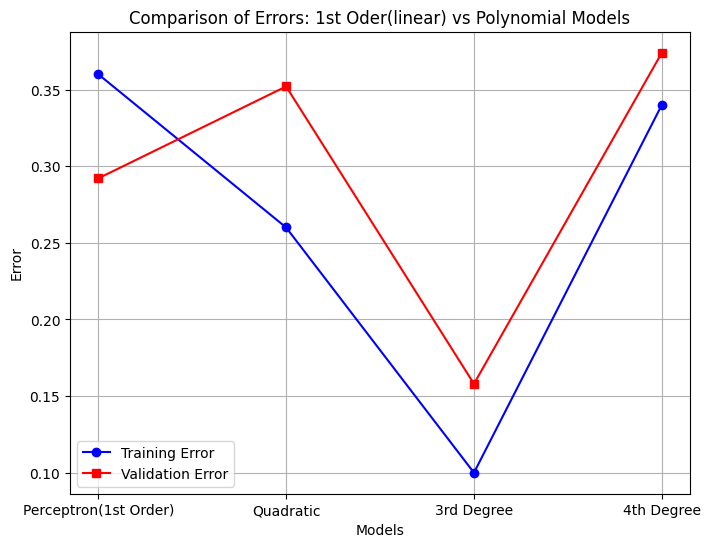

In [12]:
import matplotlib.pyplot as plt

model_labels = ['Perceptron(1st Order)','Quadratic', '3rd Degree', '4th Degree']
training_errors = [train_errors[0], train_errors[1], train_errors[2],train_errors[3]]
validation_errors = [val_errors[0], val_errors[1], val_errors[2],val_errors[3]]

plt.figure(figsize=(8, 6))
plt.plot(model_labels, training_errors, marker='o', label='Training Error', color='blue')
plt.plot(model_labels, validation_errors, marker='s', label='Validation Error', color='red')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of Errors: 1st Oder(linear) vs Polynomial Models')
plt.legend()
plt.grid(True)
plt.show()


### Observations:

#### Perceptron (1st Order) Model:
The Perceptron model demonstrates larger errors in both the training and validation sets compared to the polynomial models. Although it yields a slightly better validation error, indicating a glimpse of performance on unseen data, its overall performance is surpassed by the polynomial models.

#### Degree 2 (Quadratic) Polynomial Model:
The quadratic polynomial model displays reduced errors in both training and validation when compared to the linear (Perceptron) model. It signifies a better fit to the data and an improvement over the linear model.

#### Degree 3 Polynomial Model:
Upon introducing the 3rd order polynomial features, the training error significantly decreases, showcasing a notable improvement over the linear and quadratic models. However, the validation error also decreases, albeit not as substantially, indicating that while the 3rd order polynomial model performs better on training data, its generalization to unseen data is slightly less than desired.

#### Degree 4 Polynomial Model:
With the inclusion of 4th order polynomial features, the training error further reduces, indicating enhanced accuracy on the training set. The validation error decreases as well, becoming lower than the 3rd order polynomial model. However, the improvement in validation error is less pronounced than the training error, hinting at potential overfitting.

### Conclusion:

#### Model Selection Decision:
Based on the observations made:
I opt for the **3rd order** polynomial model as the most suitable choice. It exhibits improved performance over the linear and quadratic models, showcasing a balance between accuracy on training data and generalization to unseen data. Despite the slight decrease in generalization compared to higher-order polynomial models, its validation error is relatively lower among the models tested, indicating better potential performance on unseen data. This selection aligns with the aim of achieving better generalization without overfitting.




## Task 2

In [13]:
df=pd.read_csv('/content/drive/MyDrive/data/breast_cancer_dataset_preprocessed.csv')
df.head()
len(df)

381

In [14]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8
count,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02
mean,4.662354e-18,2.797412e-17,-1.631824e-17,-2.797412e-17,-2.797412e-17,-9.324708e-18,4.662354e-18,9.324708e-18
std,3.621316e+00,2.384647e+00,1.734338e+00,1.429617e+00,1.287268e+00,1.081252e+00,8.255491e-01,6.943847e-01
min,-5.508773e+00,-7.715905e+00,-4.493143e+00,-4.123493e+00,-4.905151e+00,-4.173706e+00,-3.651191e+00,-3.023013e+00
25%,-2.742047e+00,-1.477377e+00,-1.037060e+00,-9.484575e-01,-6.733832e-01,-7.036125e-01,-4.657817e-01,-3.591851e-01
50%,-1.110688e+00,-1.824313e-01,-1.804973e-01,-6.289660e-02,-5.918051e-02,-1.078260e-01,-5.509302e-03,1.888426e-02
75%,2.528431e+00,1.238930e+00,8.892163e-01,7.023924e-01,6.294085e-01,5.992903e-01,4.462397e-01,3.551078e-01
max,1.574861e+01,1.264984e+01,9.743745e+00,5.241572e+00,6.377598e+00,4.961734e+00,5.032409e+00,4.207317e+00


In [15]:
df.isnull().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    0
y     0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical target variable
label_encoder = LabelEncoder()
df['y_encoded'] = label_encoder.fit_transform(df['y'])


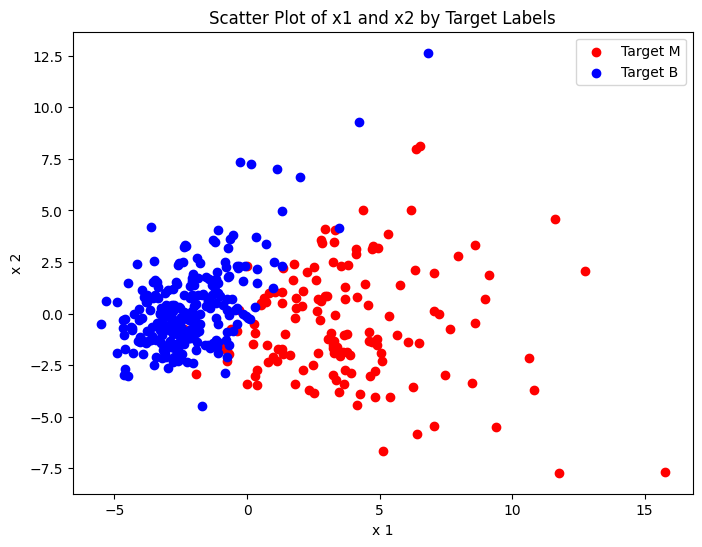

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
X = df.drop('y', axis=1)  # Features
y = df['y']  # Target labels
plt.figure(figsize=(8, 6))
color_map = {'M': 'red', 'B': 'blue'}
for target_label, color in color_map.items():
    plt.scatter(X[y == target_label].iloc[:, 0], X[y == target_label].iloc[:, 1],
                color=color, label=f"Target {target_label}")
plt.title('Scatter Plot of x1 and x2 by Target Labels')
plt.xlabel('x 1')
plt.ylabel('x 2')
plt.legend()
plt.show()


In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(['y', 'y_encoded'], axis=1)
y = df['y_encoded']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=515)


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Perceptron': Perceptron(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}




In [20]:
# Specify hyperparameters for each model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Perceptron': Perceptron(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

params = {
    'Perceptron': {'max_iter': [100, 500, 1000], 'eta0': [0.1, 0.01, 0.001]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 5, 10, 15]},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'XGBoost': {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}
}

results = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, params[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    best_params = grid_search.best_params_

    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    results[model_name] = {
        'Best Model': best_model,
        'Best Parameters': best_params,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }



In [21]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Best_Params: {metrics['Best Parameters']}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print(f"ROC AUC: {metrics['ROC AUC']}")
    print("------------------------")


Model: Perceptron
Best_Params: {'eta0': 0.01, 'max_iter': 100}
Accuracy: 0.935064935064935
Precision: 0.9655172413793104
Recall: 0.875
F1 Score: 0.9180327868852458
ROC AUC: 0.9263888888888888
------------------------
Model: Logistic Regression
Best_Params: {'C': 0.1}
Accuracy: 0.948051948051948
Precision: 1.0
Recall: 0.875
F1 Score: 0.9333333333333333
ROC AUC: 0.9375
------------------------
Model: Decision Tree
Best_Params: {'max_depth': 10}
Accuracy: 0.922077922077922
Precision: 0.9333333333333333
Recall: 0.875
F1 Score: 0.9032258064516129
ROC AUC: 0.9152777777777779
------------------------
Model: Random Forest
Best_Params: {'max_depth': None, 'n_estimators': 150}
Accuracy: 0.935064935064935
Precision: 0.9655172413793104
Recall: 0.875
F1 Score: 0.9180327868852458
ROC AUC: 0.9263888888888888
------------------------
Model: Support Vector Machine
Best_Params: {'C': 10, 'gamma': 'scale'}
Accuracy: 0.948051948051948
Precision: 0.9666666666666667
Recall: 0.90625
F1 Score: 0.9354838709677

For a task related health data specially cancer detection, where both false negatives and false positives have significant implications,a model that balances precision and recall is ideal to choose.The balance in between them reflects better F1 Score.

In my case amongst all the models I have taken into consideration to compare,though K Nearest neighbours and Logistic Regression have 100% precision means it had no false positives! But since this is a medical problem, having false positives weighs lower than false negatives.**Support Vector Machine** is having better F1 score implying less false positives and false negatives, proving it to as the best amongst others. So I would choose Support Vector Machine(SVM) with parameters as {'C': 10, 'gamma': 'scale'}.